In [30]:
import requests
import requests_cache
import json
import urllib2
import pandas as pd
from datetime import timedelta, date
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

requests_cache.install_cache("cache")

In [79]:
#json return value sample
temp = requests.get("http://api.wunderground.com/api/7c7b33990456667c/history_20120504/q/CA/Fresno.json")
temp.json()['history']['dailysummary'][0]

{u'coolingdegreedays': u'1',
 u'coolingdegreedaysnormal': u'4',
 u'date': {u'hour': u'12',
  u'mday': u'04',
  u'min': u'00',
  u'mon': u'05',
  u'pretty': u'12:00 PM PDT on May 04, 2012',
  u'tzname': u'America/Los_Angeles',
  u'year': u'2012'},
 u'fog': u'0',
 u'gdegreedays': u'16',
 u'hail': u'0',
 u'heatingdegreedays': u'0',
 u'heatingdegreedaysnormal': u'2',
 u'humidity': u'',
 u'maxdewpti': u'52',
 u'maxdewptm': u'11',
 u'maxhumidity': u'93',
 u'maxpressurei': u'30.13',
 u'maxpressurem': u'1020',
 u'maxtempi': u'77',
 u'maxtempm': u'25',
 u'maxvisi': u'10',
 u'maxvism': u'16',
 u'maxwspdi': u'17',
 u'maxwspdm': u'27',
 u'meandewpti': u'47',
 u'meandewptm': u'8',
 u'meanpressurei': u'30.09',
 u'meanpressurem': u'1019',
 u'meantempi': u'66',
 u'meantempm': u'19',
 u'meanvisi': u'10',
 u'meanvism': u'16',
 u'meanwdird': u'314',
 u'meanwdire': u'',
 u'meanwindspdi': u'10',
 u'meanwindspdm': u'16',
 u'mindewpti': u'37',
 u'mindewptm': u'3',
 u'minhumidity': u'33',
 u'minpressurei': u'

In [25]:
cities = ["San_Francisco", "Fresno", "Sacramento", "San_Jose", "San_Diego"]
#, "Bakersfield", "Modesto", "Los_Angeles", "San_Luis_Obispo"]
stations = [60410001, 60195001, 60170010, 60690003, 60731006]

In [12]:
def weather(date, city, attribute):
    temp = requests.get("http://api.wunderground.com/api/7c7b33990456667c/history_" + date + "/q/CA/" + city + ".json")
    return temp.json()['history']['dailysummary'][0][attribute]       

In [50]:
df = pd.DataFrame()

for i in range(12,17):
    for j in range(0,5):
        city = cities[j]
        csv = 'data/ozone/' + city + '/ad_viz_plotval_data' + str(i) + '.csv'
        tempdf = pd.DataFrame.from_csv(csv)
        tempdf = tempdf.loc[tempdf['AQS_SITE_ID'] == stations[j]]
        
        precips = []
        for date in tempdf.index: 
            precips.append(weather(date.strftime("%Y%m%d"), city, 'precip'))
        
        windspeed = []
        for date in tempdf.index: 
            precips.append(weather(date.strftime("%Y%m%d"), city, 'precip'))
            
        tempdf['precip'] = precips
        
        tempdf['city'] = city
        tempdf['year'] = 2000+i
        df = pd.concat([df, tempdf])

In [51]:
df.loc[df['precip'] == 'T'] = 0.00

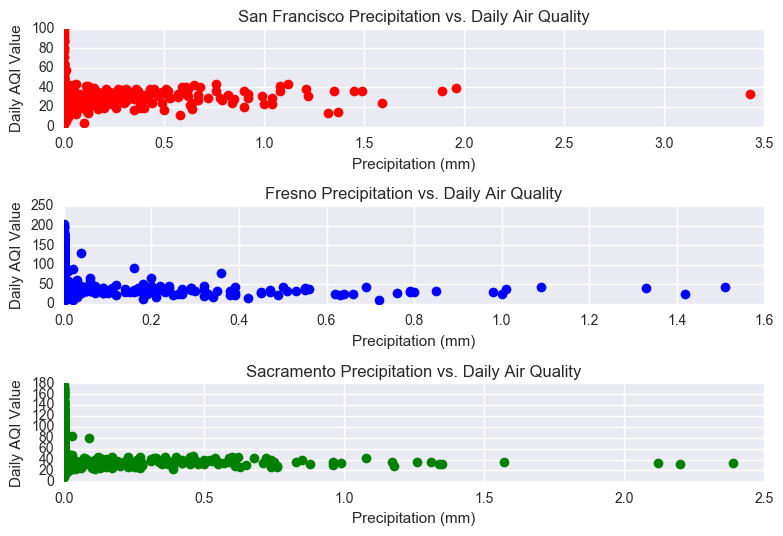

In [81]:
plt.figure(1)

plt.subplot(311)
plt.plot(df.loc[df['city'] == 'San_Francisco']['precip'], df.loc[df['city'] == 'San_Francisco']['DAILY_AQI_VALUE'], 'ro')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Daily AQI Value')
plt.title('San Francisco Precipitation vs. Daily Air Quality')

plt.subplot(312)
plt.plot(df.loc[df['city'] == 'Fresno']['precip'], df.loc[df['city'] == 'Fresno']['DAILY_AQI_VALUE'], 'bo')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Daily AQI Value')
plt.title('Fresno Precipitation vs. Daily Air Quality')
plt.tight_layout() 

plt.subplot(313)
plt.plot(df.loc[df['city'] == 'Sacramento']['precip'], df.loc[df['city'] == 'Sacramento']['DAILY_AQI_VALUE'], 'go')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Daily AQI Value')
plt.title('Sacramento Precipitation vs. Daily Air Quality')

plt.tight_layout() 
plt.show()